## Importing the necessary libraries



In [1]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings("ignore")

## Loading the Advertising Data set

In [2]:
data  = pd.read_csv("Advertising.csv")

In [3]:
#Dropping the unnecessary columns

data.drop(columns="Unnamed: 0",axis=1,inplace=True)

In [4]:
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


## Descriptive statistics of the data

In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
Radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
Newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
Sales,200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0


In [6]:
# To check if the data contains any null or missing values
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


## Normalising the data

In [7]:
# apply normalization techniques
for column in data.columns:
    data[column] = (data[column] - data[column].min()) / (data[column].max() - data[column].min())    

In [8]:
data.head()

,TV,Radio,Newspaper,Sales
0,0.775786,0.762097,0.605981,0.807087
1,0.148123,0.792339,0.394019,0.346457
2,0.055800,0.925403,0.606860,0.303150
3,0.509976,0.832661,0.511873,0.665354
4,0.609063,0.217742,0.510994,0.444882


## Visualisisng the Data

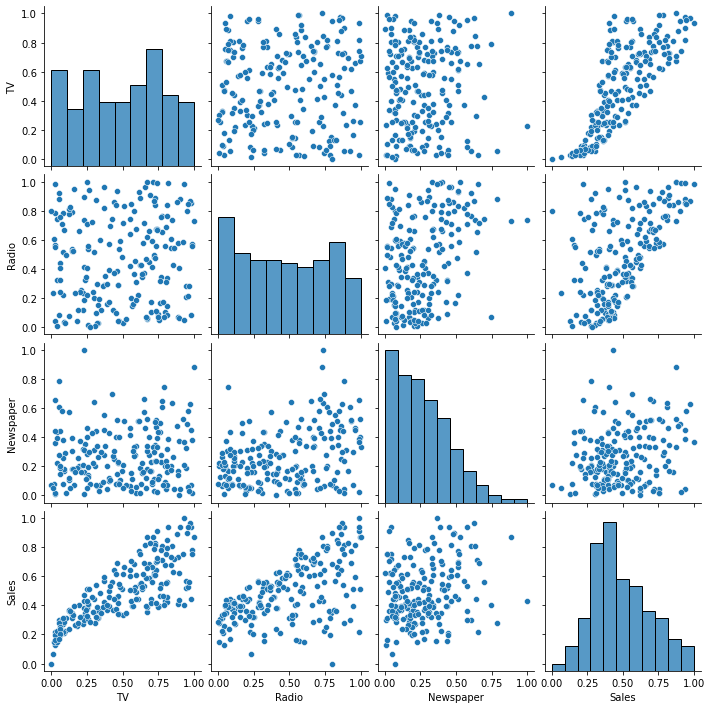

In [9]:
import seaborn as sns

sns.pairplot(data)

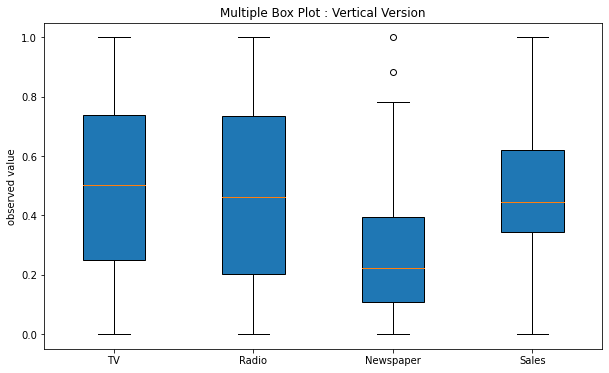

In [10]:
# Check for outliers

import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))


plt.boxplot(data.iloc[:,:5], vert=True, patch_artist=True, labels=data.columns) 
plt.ylabel('observed value')
plt.title('Multiple Box Plot : Vertical Version')
plt.show()

## Find the optimal value of k - Elbow Method

In [11]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score

scores = []
errors = []

for i in range(1,40):
    
    knn = KNeighborsRegressor(n_neighbors=i)
    score=cross_val_score(knn,data.iloc[:,1:],data.iloc[:,:1],cv=10)
    scores.append(score.mean())
    errors.append(1-score.mean())

Text(0, 0.5, 'Error')

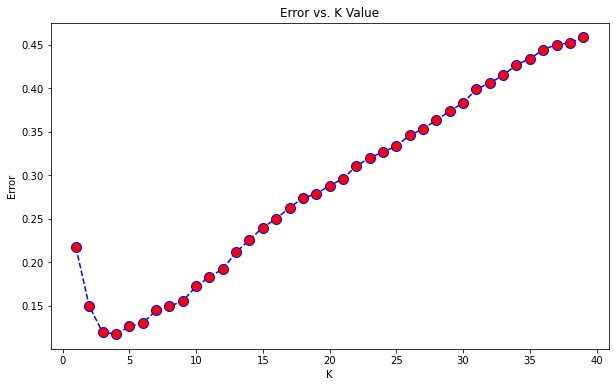

In [12]:

plt.figure(figsize=(10,6))

plt.plot(range(1,40),errors,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)

plt.title('Error vs. K Value')
plt.xlabel('K')
plt.ylabel('Error')

In [13]:
# Splittng the data into test and train datasets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data.iloc[:,:-1],data.iloc[:,-1:],test_size=0.25)

## Training the KNN Regressor

In [14]:
knn = KNeighborsRegressor(n_neighbors=4)
knn.fit(X_train,y_train)

y_pred = knn.predict(X_test)

In [15]:
y_pred.reshape(1,-1)[0]

array([0.51279528, 0.26968504, 0.63779528, 0.38877953, 0.30511811,
       0.64173228, 0.52362205, 0.66141732, 0.39074803, 0.8257874 ,
       0.28740157, 0.60334646, 0.22933071, 0.44980315, 0.24015748,
       0.30807087, 0.37992126, 0.50098425, 0.6003937 , 0.71555118,
       0.2519685 , 0.30511811, 0.46456693, 0.52755906, 0.28051181,
       0.66633858, 0.35728346, 0.81299213, 0.63188976, 0.87992126,
       0.39468504, 0.93602362, 0.39468504, 0.21456693, 0.54527559,
       0.41043307, 0.75295276, 0.38385827, 0.52362205, 0.47145669,
       0.34055118, 0.27755906, 0.73228346, 0.26968504, 0.30807087,
       0.56692913, 0.33464567, 0.24901575, 0.38877953, 0.3523622 ])

In [16]:
results = pd.DataFrame(columns=['y_pred','y_test'])
results['y_pred'] = y_pred.reshape(1,-1)[0]
results['y_test'] = y_test[['Sales']].values.reshape(1,-1)[0]

In [17]:
results.head()

,y_pred,y_test
0,0.512795,0.515748
1,0.269685,0.362205
2,0.637795,0.708661
3,0.388780,0.425197
4,0.305118,0.318898


## Model Evaluation

In [18]:
# Root mean squared error
from sklearn.metrics import mean_squared_error
print("RMSE",mean_squared_error(results['y_pred'],results['y_test'])**1/2)

RMSE 0.0009790788331576665


In [19]:
print("R Square",knn.score(X_test,y_test))

R Square 0.9482318619228928
